# PARTIE 3 — Visualisation
## Matplotlib & Seaborn Analysis of Uber Rides 2024

This notebook creates 6 professional visualizations of the cleaned Uber Rides dataset:
1. Line plot — Evolution of bookings over time
2. Bar plot — Bookings by vehicle type
3. Bar plot — Cancellation reasons
4. Histogram — Distribution of booking values
5. Box plot — Ratings by vehicle type
6. Scatter plot — Distance vs booking value


In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load cleaned data
BASE_DIR = Path.cwd().parent
CLEAN_PATH = BASE_DIR / "data" / "processed" / "ride_bookings_clean.csv"
df = pd.read_csv(CLEAN_PATH)

print(f"Dataset loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nColumns: {', '.join(df.columns)}")
print(f"\nData types:\n{df.dtypes}")


Dataset loaded: 150,000 rows × 25 columns

Columns: date, time, booking_id, booking_status, customer_id, vehicle_type, pickup_location, drop_location, avg_vtat, avg_ctat, cancelled_rides_by_customer, reason_for_cancelling_by_customer, cancelled_rides_by_driver, driver_cancellation_reason, incomplete_rides, incomplete_rides_reason, booking_value, ride_distance, driver_ratings, customer_rating, payment_method, month, day_name, is_weekend, hour

Data types:
date                                  object
time                                  object
booking_id                            object
booking_status                        object
customer_id                           object
vehicle_type                          object
pickup_location                       object
drop_location                         object
avg_vtat                             float64
avg_ctat                             float64
cancelled_rides_by_customer          float64
reason_for_cancelling_by_customer     object
c

## Plot 1: Évolution des Réservations dans le Temps

**ماذا سنرسم؟** رسم خط يوضح تطور عدد الحجوزات بمرور الوقت (يومياً)

**لماذا هذا الرسم مهم؟** يساعدنا على فهم الاتجاهات والأنماط في الطلب على الخدمة

**ماذا نتوقع أن نلاحظ؟** قد نرى تقلبات يومية وأسبوعية، وربما اتجاهات تصاعدية أو تنازلية


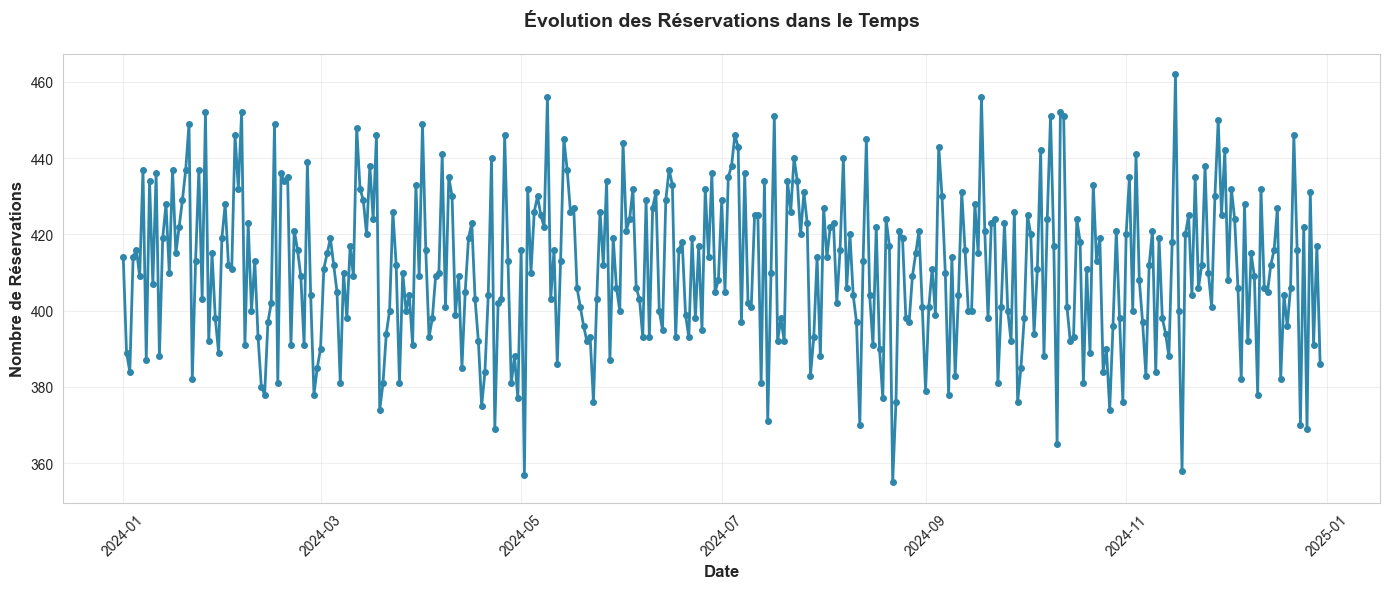

In [6]:
# Plot 1: Line Chart - Evolution of Bookings Over Time
if "date" in df.columns:
    # Convert date to datetime if needed
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    
    # Group by date and count bookings
    daily_bookings = df.groupby(df['date'].dt.date).size().reset_index()
    daily_bookings.columns = ['date', 'bookings']
    
    # Create figure
    plt.figure(figsize=(14, 6))
    plt.plot(daily_bookings['date'], daily_bookings['bookings'], marker='o', linewidth=2, markersize=4, color='#2E86AB')
    
    # Styling
    plt.title('Évolution des Réservations dans le Temps', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Date', fontsize=12, fontweight='bold')
    plt.ylabel('Nombre de Réservations', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("⚠ Colonne 'date' non trouvée dans le dataset")


## Plot 2: Réservations par Type de Véhicule

**ماذا سنرسم؟** رسم بياني عمودي يقارن عدد الحجوزات لكل نوع من أنواع المركبات

**لماذا هذا الرسم مهم؟** يساعدنا على فهم أي أنواع المركبات الأكثر طلباً من قبل العملاء

**ماذا نتوقع أن نلاحظ؟** قد نرى أن بعض الأنواع (مثل UberX) أكثر شيوعاً من غيرها


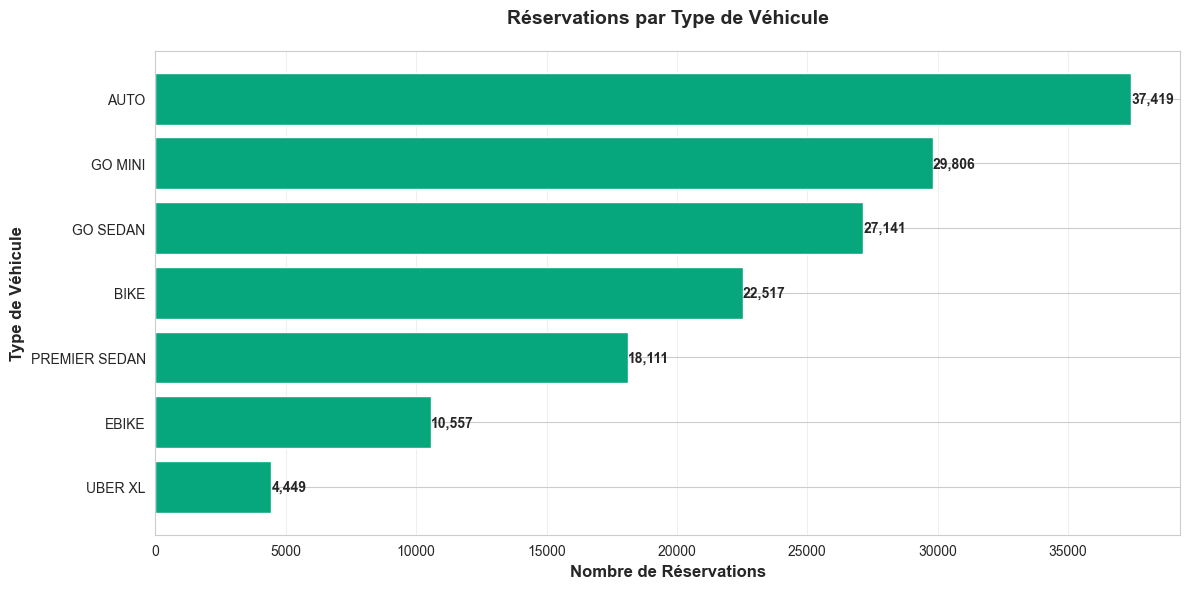

In [7]:
# Plot 2: Bar Chart - Bookings by Vehicle Type
if "vehicle_type" in df.columns:
    # Count bookings by vehicle type
    vehicle_counts = df['vehicle_type'].value_counts().sort_values(ascending=True)
    
    # Create figure
    plt.figure(figsize=(12, 6))
    bars = plt.barh(vehicle_counts.index, vehicle_counts.values, color='#06A77D')
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{int(width):,}', 
                ha='left', va='center', fontsize=10, fontweight='bold')
    
    # Styling
    plt.title('Réservations par Type de Véhicule', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Nombre de Réservations', fontsize=12, fontweight='bold')
    plt.ylabel('Type de Véhicule', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
else:
    print("⚠ Colonne 'vehicle_type' non trouvée dans le dataset")


## Plot 3: أسباب الإلغاء

**ماذا سنرسم؟** رسم بياني يعرض أكثر 10 أسباب شيوعاً لإلغاء الحجوزات (من قبل العملاء والسائقين)

**لماذا هذا الرسم مهم؟** يساعدنا على فهم المشاكل الرئيسية التي تؤدي إلى الخسائر المالية

**ماذا نتوقع أن نلاحظ؟** قد نرى أن الأسباب مثل "Traffic" أو "Driver Not Available" هي الأكثر شيوعاً


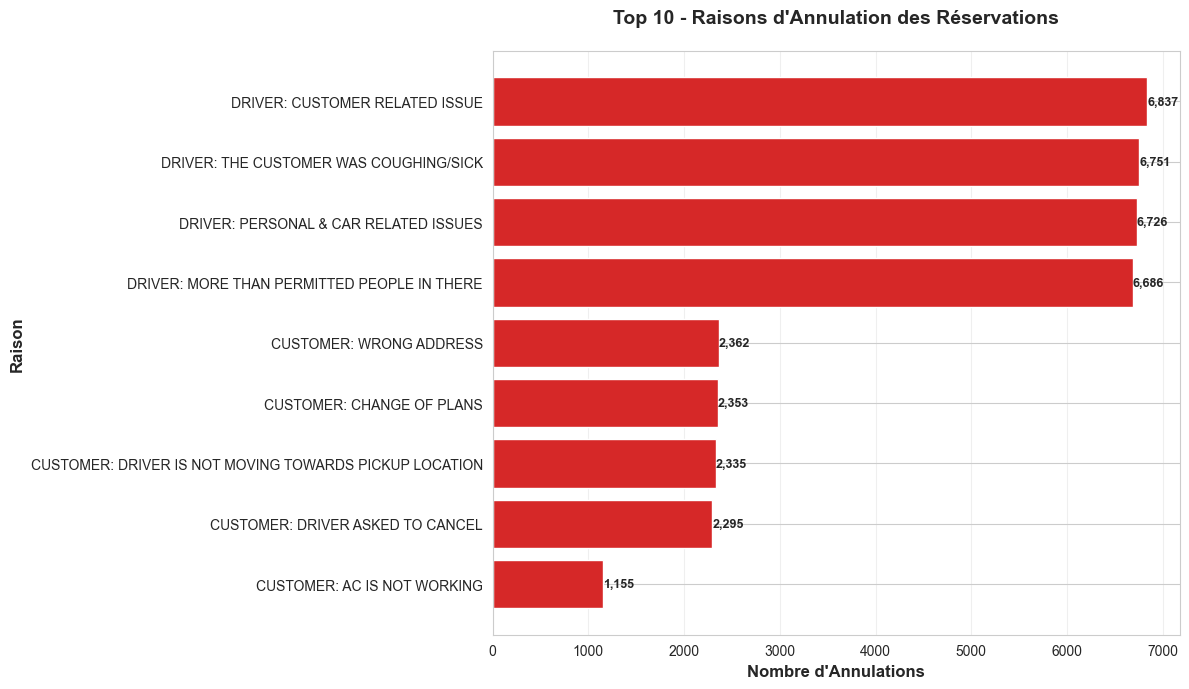

In [8]:
# Plot 3: Bar Chart - Top Cancellation Reasons
cancellation_reasons = []

# Collect customer cancellation reasons
if "reason_for_cancelling_by_customer" in df.columns:
    cust_reasons = df[df['reason_for_cancelling_by_customer'].notna()]['reason_for_cancelling_by_customer'].value_counts()
    for reason, count in cust_reasons.items():
        if reason not in ['NO_ISSUE', 'UNKNOWN', '']:
            cancellation_reasons.append({'reason': f'CUSTOMER: {reason}', 'count': count})

# Collect driver cancellation reasons
if "driver_cancellation_reason" in df.columns:
    driver_reasons = df[df['driver_cancellation_reason'].notna()]['driver_cancellation_reason'].value_counts()
    for reason, count in driver_reasons.items():
        if reason not in ['NO_ISSUE', 'UNKNOWN', '']:
            cancellation_reasons.append({'reason': f'DRIVER: {reason}', 'count': count})

# Create dataframe and get top 10
if cancellation_reasons:
    reasons_df = pd.DataFrame(cancellation_reasons).sort_values('count', ascending=True).tail(10)
    
    plt.figure(figsize=(12, 7))
    bars = plt.barh(reasons_df['reason'], reasons_df['count'], color='#D62828')
    
    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{int(width):,}', 
                ha='left', va='center', fontsize=9, fontweight='bold')
    
    # Styling
    plt.title('Top 10 - Raisons d\'Annulation des Réservations', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Nombre d\'Annulations', fontsize=12, fontweight='bold')
    plt.ylabel('Raison', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
else:
    print("⚠ Pas de raisons d'annulation trouvées")


## Plot 4: توزيع قيم الحجز

**ماذا سنرسم؟** رسم بياني (Histogram) يوضح توزيع قيم الحجوزات (الأسعار)

**لماذا هذا الرسم مهم؟** يساعدنا على فهم نطاق الأسعار والقيمة المتوسطة للحجزة

**ماذا نتوقع أن نلاحظ؟** قد نرى أن معظم الحجوزات تكون في نطاق سعري معين، مع بعض الحجوزات الأغلى


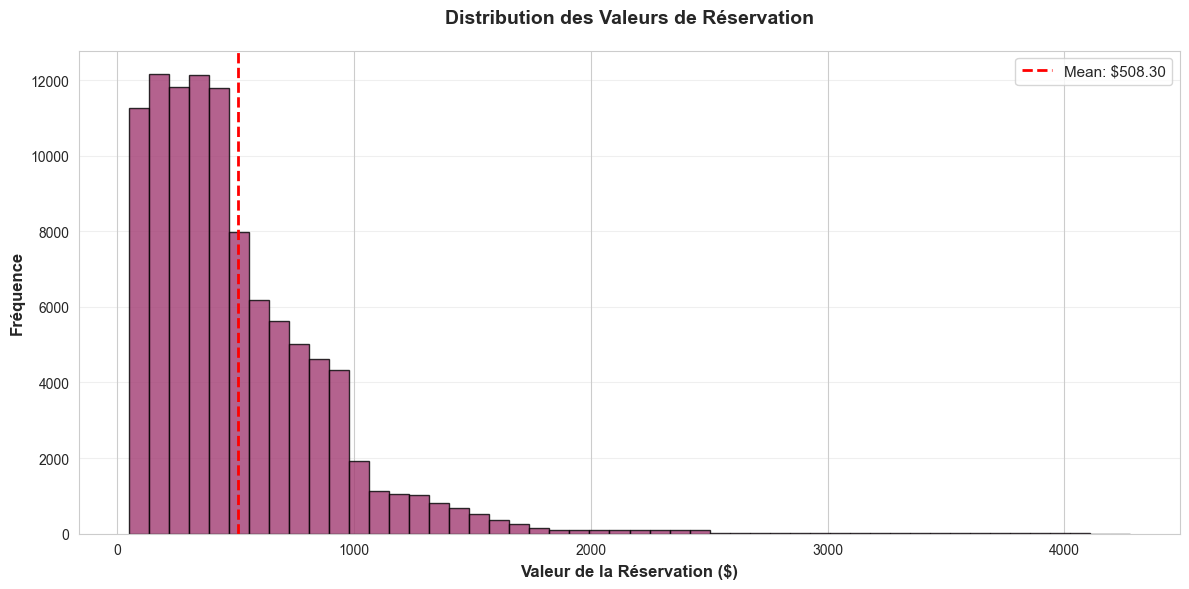

In [9]:
# Plot 4: Histogram - Distribution of Booking Values
if "booking_value" in df.columns:
    # Filter out NaN values
    booking_values = df['booking_value'].dropna()
    
    plt.figure(figsize=(12, 6))
    plt.hist(booking_values, bins=50, color='#A23B72', alpha=0.8, edgecolor='black')
    
    # Add mean line
    mean_value = booking_values.mean()
    plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_value:.2f}')
    
    # Styling
    plt.title('Distribution des Valeurs de Réservation', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Valeur de la Réservation ($)', fontsize=12, fontweight='bold')
    plt.ylabel('Fréquence', fontsize=12, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("⚠ Colonne 'booking_value' non trouvée dans le dataset")


## Plot 5: التقييمات حسب نوع المركبة

**ماذا سنرسم؟** رسم Box Plot يوضح توزيع تقييمات العملاء لكل نوع من المركبات

**لماذا هذا الرسم مهم؟** يساعدنا على فهم جودة الخدمة لكل نوع مركبة

**ماذا نتوقع أن نلاحظ؟** قد نرى أن بعض أنواع المركبات لديها تقييمات أعلى من غيرها


C:\Users\HP\AppData\Local\Temp\ipykernel_22700\1399516345.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rating_data, x='vehicle_type', y='customer_rating', palette='Set2')


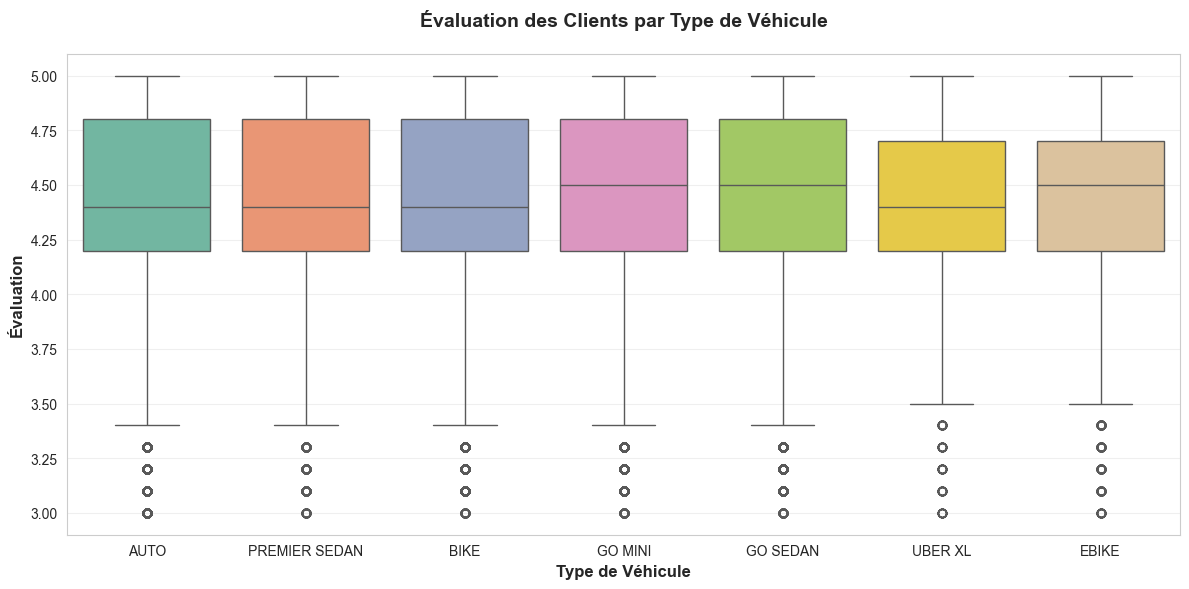

In [10]:
# Plot 5: Box Plot - Ratings by Vehicle Type
if "customer_rating" in df.columns and "vehicle_type" in df.columns:
    # Filter out NaN ratings
    rating_data = df[['vehicle_type', 'customer_rating']].dropna()
    
    if len(rating_data) > 0:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=rating_data, x='vehicle_type', y='customer_rating', palette='Set2')
        
        # Styling
        plt.title('Évaluation des Clients par Type de Véhicule', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Type de Véhicule', fontsize=12, fontweight='bold')
        plt.ylabel('Évaluation', fontsize=12, fontweight='bold')
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()
    else:
        print("⚠ Pas de données de notation disponibles")
else:
    print("⚠ Colonnes 'customer_rating' ou 'vehicle_type' non trouvées")


## Plot 6: المسافة مقابل قيمة الرحلة

**ماذا سنرسم؟** رسم مبعثر يوضح العلاقة بين المسافة المقطوعة وقيمة الرحلة

**لماذا هذا الرسم مهم؟** يساعدنا على فهم كيفية تحديد الأسعار بناءً على المسافة

**ماذا نتوقع أن نلاحظ؟** نتوقع علاقة طردية قوية: كلما زادت المسافة، زادت قيمة الرحلة


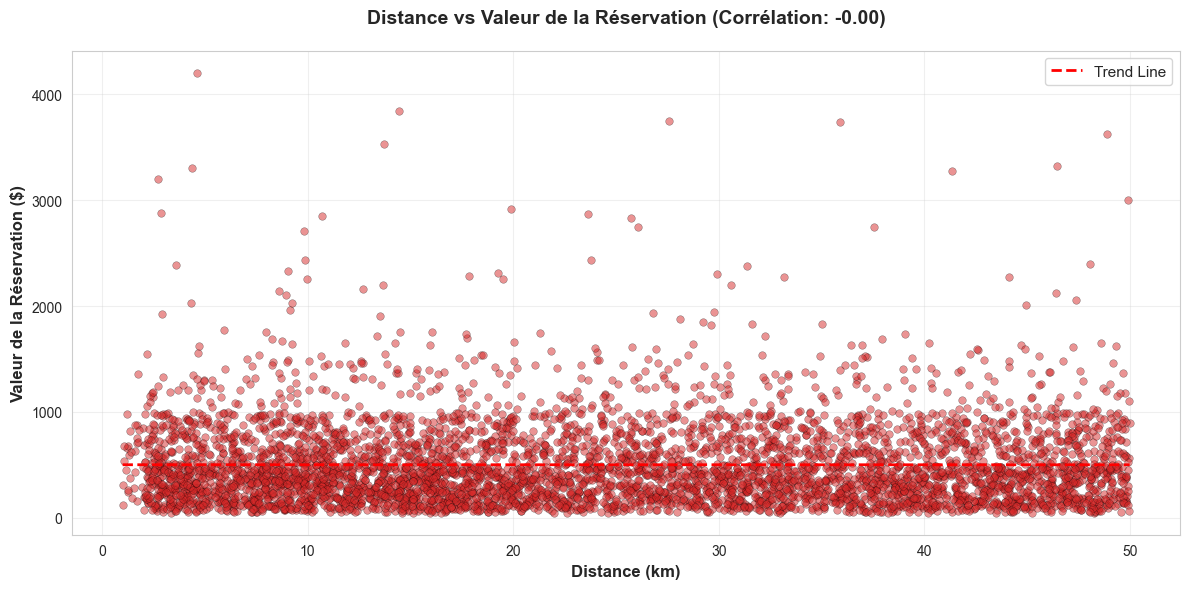

In [11]:
# Plot 6: Scatter Plot - Distance vs Booking Value
if "ride_distance" in df.columns and "booking_value" in df.columns:
    # Filter out NaN values in both columns
    scatter_data = df[['ride_distance', 'booking_value']].dropna()
    
    # Sample if too many points (for better visualization)
    if len(scatter_data) > 5000:
        scatter_data = scatter_data.sample(n=5000, random_state=42)
    
    if len(scatter_data) > 0:
        plt.figure(figsize=(12, 6))
        plt.scatter(scatter_data['ride_distance'], scatter_data['booking_value'], 
                   alpha=0.5, s=30, color='#D62828', edgecolors='black', linewidth=0.3)
        
        # Add trend line
        z = np.polyfit(scatter_data['ride_distance'], scatter_data['booking_value'], 1)
        p = np.poly1d(z)
        x_trend = np.linspace(scatter_data['ride_distance'].min(), scatter_data['ride_distance'].max(), 100)
        plt.plot(x_trend, p(x_trend), "r--", linewidth=2, label='Trend Line')
        
        # Calculate correlation
        correlation = scatter_data['ride_distance'].corr(scatter_data['booking_value'])
        
        # Styling
        plt.title(f'Distance vs Valeur de la Réservation (Corrélation: {correlation:.2f})', 
                 fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Distance (km)', fontsize=12, fontweight='bold')
        plt.ylabel('Valeur de la Réservation ($)', fontsize=12, fontweight='bold')
        plt.legend(fontsize=11)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("⚠ Pas de données disponibles pour le scatter plot")
else:
    print("⚠ Colonnes 'ride_distance' ou 'booking_value' non trouvées")


## الملخص

تم إنشاء 6 تصورات احترافية للبيانات:

✅ **الرسم 1**: خط زمني يوضح تطور عدد الحجوزات يومياً

✅ **الرسم 2**: مقارنة عدد الحجوزات لكل نوع من المركبات

✅ **الرسم 3**: أكثر 10 أسباب شيوعاً لإلغاء الحجوزات

✅ **الرسم 4**: توزيع أسعار الحجوزات مع متوسط القيمة

✅ **الرسم 5**: توزيع التقييمات لكل نوع مركبة

✅ **الرسم 6**: العلاقة بين المسافة وسعر الرحلة مع خط الاتجاه

تم استخدام Matplotlib و Seaborn مع أسلوب احترافي وألوان واضحة وسهلة الفهم.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Load cleaned data
BASE_DIR = Path.cwd().parent
CLEAN_PATH = BASE_DIR / "data" / "processed" / "ride_bookings_clean.csv"

df = pd.read_csv(CLEAN_PATH)
print(f"✓ Dataset loaded: {df.shape[0]:,} rows, {df.shape[1]} columns")
print(f"\nColumns available:\n{list(df.columns)}")

✓ Dataset loaded: 150,000 rows, 25 columns

Columns available:
['date', 'time', 'booking_id', 'booking_status', 'customer_id', 'vehicle_type', 'pickup_location', 'drop_location', 'avg_vtat', 'avg_ctat', 'cancelled_rides_by_customer', 'reason_for_cancelling_by_customer', 'cancelled_rides_by_driver', 'driver_cancellation_reason', 'incomplete_rides', 'incomplete_rides_reason', 'booking_value', 'ride_distance', 'driver_ratings', 'customer_rating', 'payment_method', 'month', 'day_name', 'is_weekend', 'hour']


---
## الرسم البياني 1: تطور الحجوزات عبر الزمن

### ماذا سنرسم؟
رسم خط يوضح عدد الحجوزات يومياً على مدى الفترة

### لماذا هذا الرسم مهم؟
يساعد في فهم الاتجاهات والأنماط الموسمية للطلب

### ماذا نتوقع أن نلاحظ؟
تقلبات في الطلب اليومي وقد نرى ذروات في أيام معينة

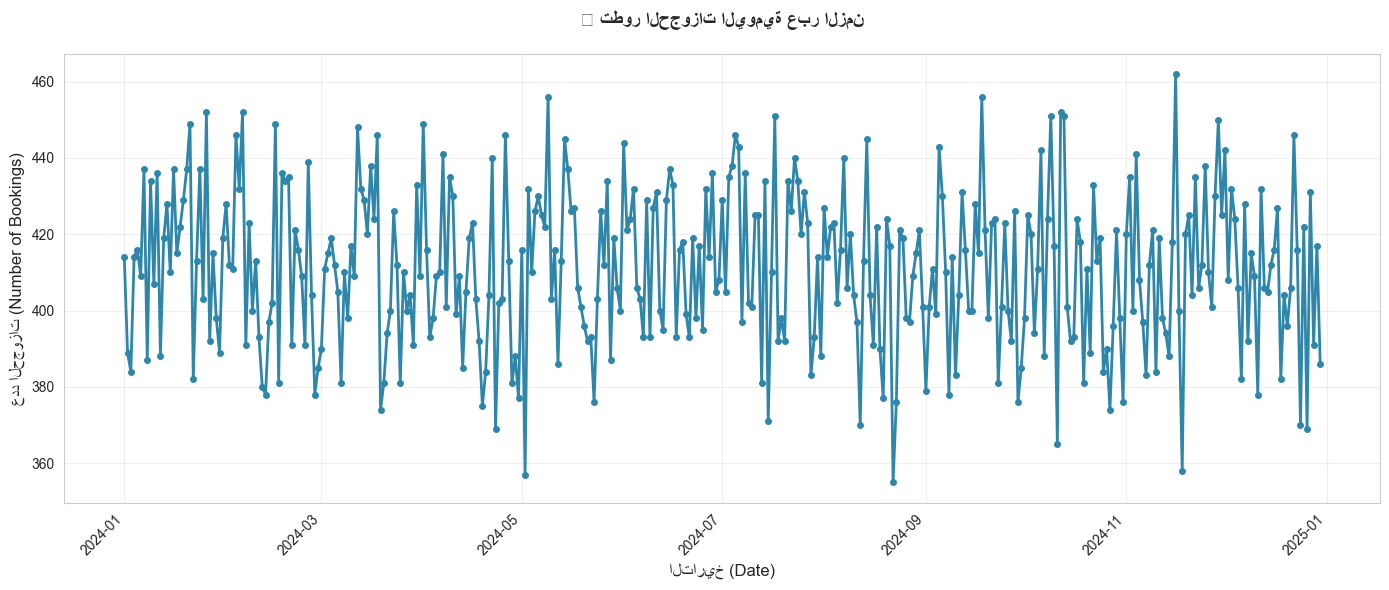

✓ Visualization 1: Daily bookings trend created


In [13]:
# Visualization 1: Time Series - Daily Bookings Evolution
if "date" in df.columns:
    # Convert date to datetime if not already
    df["date"] = pd.to_datetime(df["date"], errors='coerce')
    
    # Group by date and count bookings
    daily_bookings = df.groupby(df["date"].dt.date).size()
    
    # Create the plot
    plt.figure(figsize=(14, 6))
    plt.plot(daily_bookings.index, daily_bookings.values, linewidth=2, marker='o', markersize=4, color='#2E86AB')
    plt.title('📊 تطور الحجوزات اليومية عبر الزمن', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('التاريخ (Date)', fontsize=12)
    plt.ylabel('عدد الحجوزات (Number of Bookings)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    print("✓ Visualization 1: Daily bookings trend created")
else:
    print("⚠️ 'date' column not found")

---
## الرسم البياني 2: الحجوزات حسب نوع المركبة

### ماذا سنرسم؟
رسم بياني عمودي يقارن عدد الحجوزات لكل نوع مركبة

### لماذا هذا الرسم مهم؟
يوضح أي نوع مركبة الأكثر طلباً والأقل

### ماذا نتوقع أن نلاحظ؟
تنوع في الطلب حسب نوع المركبة مع أنواع رابحة وأخرى أقل

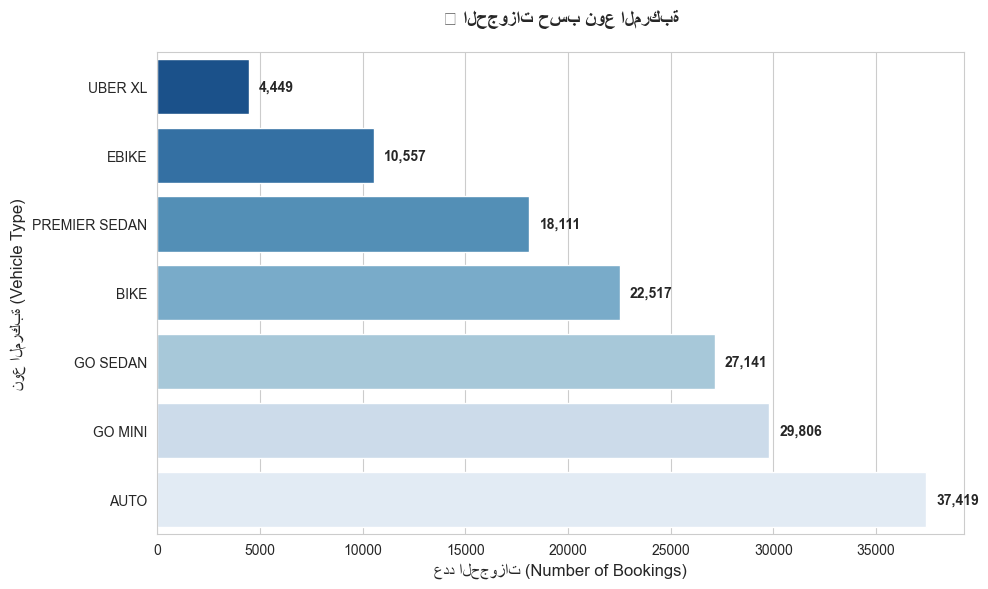

✓ Visualization 2: Vehicle type bookings created


In [14]:
# Visualization 2: Bar Plot - Bookings by Vehicle Type
if "vehicle_type" in df.columns:
    vehicle_counts = df["vehicle_type"].value_counts().sort_values(ascending=True)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=vehicle_counts.values, y=vehicle_counts.index, palette='Blues_r')
    plt.title('🚗 الحجوزات حسب نوع المركبة', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('عدد الحجوزات (Number of Bookings)', fontsize=12)
    plt.ylabel('نوع المركبة (Vehicle Type)', fontsize=12)
    
    # Add value labels on bars
    for i, v in enumerate(vehicle_counts.values):
        plt.text(v + 500, i, f'{v:,}', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    print("✓ Visualization 2: Vehicle type bookings created")
else:
    print("⚠️ 'vehicle_type' column not found")

---
## الرسم البياني 3: أسباب الإلغاء

### ماذا سنرسم؟
رسم بياني عمودي يظهر أكثر 10 أسباب شيوعاً للإلغاء

### لماذا هذا الرسم مهم؟
يساعد في تحديد المشاكل الرئيسية والعوامل التي تحتاج تحسين

### ماذا نتوقع أن نلاحظ؟
بعض الأسباب ستهيمن على الإلغاءات أكثر من غيرها

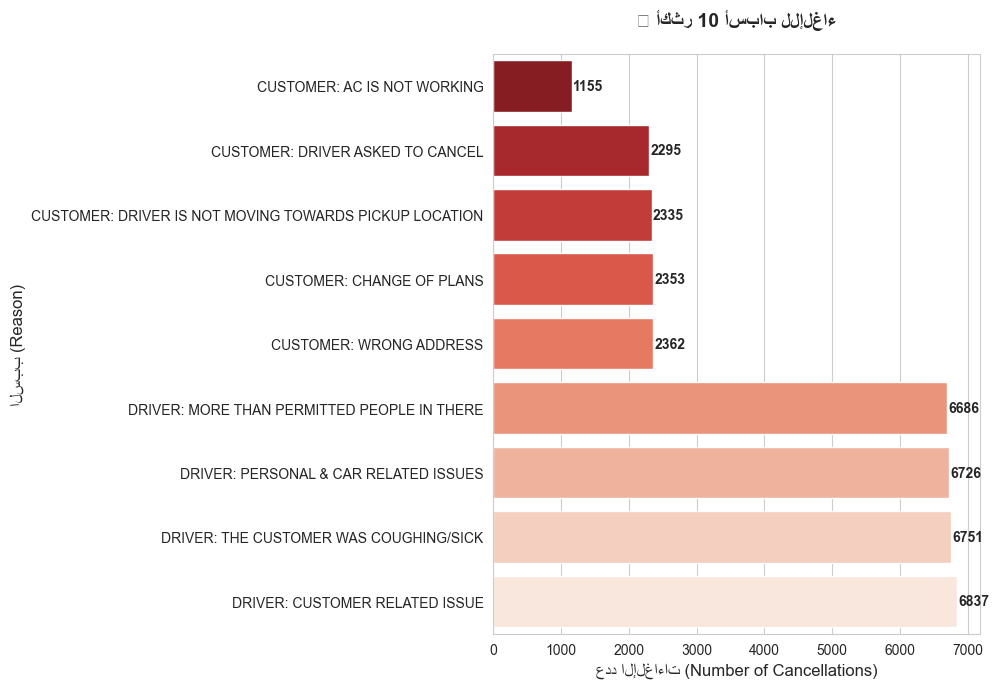

✓ Visualization 3: Cancellation reasons created


In [15]:
# Visualization 3: Bar Plot - Cancellation Reasons
cancellation_reasons = []

# Collect customer cancellation reasons
if "reason_for_cancelling_by_customer" in df.columns:
    customer_reasons = df[df["reason_for_cancelling_by_customer"].notna()]["reason_for_cancelling_by_customer"].value_counts()
    for reason, count in customer_reasons.items():
        if reason not in ["UNKNOWN", "NO_ISSUE", None, ""]:
            cancellation_reasons.append((f"CUSTOMER: {reason}", count))

# Collect driver cancellation reasons
if "driver_cancellation_reason" in df.columns:
    driver_reasons = df[df["driver_cancellation_reason"].notna()]["driver_cancellation_reason"].value_counts()
    for reason, count in driver_reasons.items():
        if reason not in ["UNKNOWN", "NO_ISSUE", None, ""]:
            cancellation_reasons.append((f"DRIVER: {reason}", count))

if len(cancellation_reasons) > 0:
    # Sort and take top 10
    cancellation_reasons.sort(key=lambda x: x[1], reverse=True)
    top_reasons = cancellation_reasons[:10]
    
    reasons_df = pd.DataFrame(top_reasons, columns=['Reason', 'Count']).sort_values('Count')
    
    plt.figure(figsize=(10, 7))
    sns.barplot(data=reasons_df, y='Reason', x='Count', palette='Reds_r')
    plt.title('❌ أكثر 10 أسباب للإلغاء', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('عدد الإلغاءات (Number of Cancellations)', fontsize=12)
    plt.ylabel('السبب (Reason)', fontsize=12)
    
    # Add value labels
    for i, v in enumerate(reasons_df['Count'].values):
        plt.text(v + 20, i, f'{int(v)}', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    print("✓ Visualization 3: Cancellation reasons created")
else:
    print("⚠️ No cancellation reason columns found or no data")

---
## الرسم البياني 4: توزيع قيم الحجوزات

### ماذا سنرسم؟
رسم بياني هيستوجرام يظهر توزيع قيم الحجوزات (الأسعار)

### لماذا هذا الرسم مهم؟
يساعد في فهم توزيع الأسعار والنطاق السعري للعملاء

### ماذا نتوقع أن نلاحظ؟
قد يكون التوزيع طبيعياً أو منحرفاً مع وجود قيم شاذة

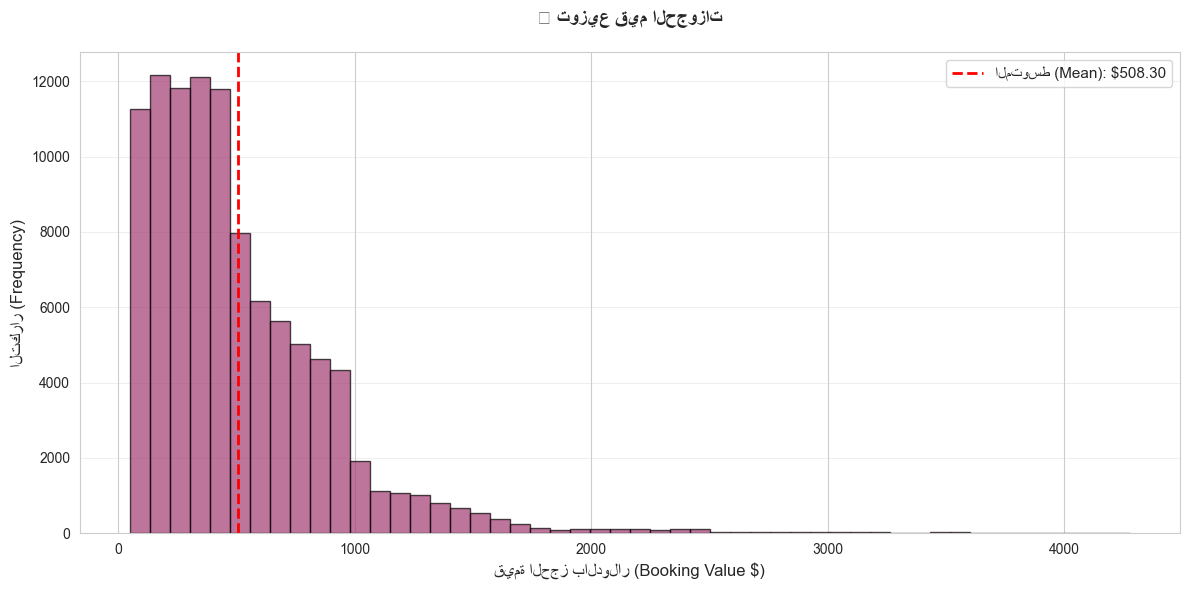

✓ Visualization 4: Booking value distribution created
  Mean: $508.30
  Min: $50.00
  Max: $4277.00


In [16]:
# Visualization 4: Histogram - Booking Value Distribution
if "booking_value" in df.columns:
    # Filter out NaN and negative values
    booking_values = df["booking_value"].dropna()
    booking_values = booking_values[booking_values > 0]
    
    if len(booking_values) > 0:
        plt.figure(figsize=(12, 6))
        plt.hist(booking_values, bins=50, color='#A23B72', edgecolor='black', alpha=0.7)
        
        # Add mean line
        mean_value = booking_values.mean()
        plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'المتوسط (Mean): ${mean_value:.2f}')
        
        plt.title('📊 توزيع قيم الحجوزات', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('قيمة الحجز بالدولار (Booking Value $)', fontsize=12)
        plt.ylabel('التكرار (Frequency)', fontsize=12)
        plt.legend(fontsize=11)
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()
        
        print(f"✓ Visualization 4: Booking value distribution created")
        print(f"  Mean: ${mean_value:.2f}")
        print(f"  Min: ${booking_values.min():.2f}")
        print(f"  Max: ${booking_values.max():.2f}")
    else:
        print("⚠️ No valid booking values found")
else:
    print("⚠️ 'booking_value' column not found")

---
## الرسم البياني 5: التقييمات حسب نوع المركبة

### ماذا سنرسم؟
رسم بياني (Box Plot) يوضح توزيع التقييمات لكل نوع مركبة

### لماذا هذا الرسم مهم؟
يساعد في مقارنة جودة الخدمة حسب نوع المركبة

### ماذا نتوقع أن نلاحظ؟
بعض أنواع المركبات قد تحصل على تقييمات أفضل من غيرها

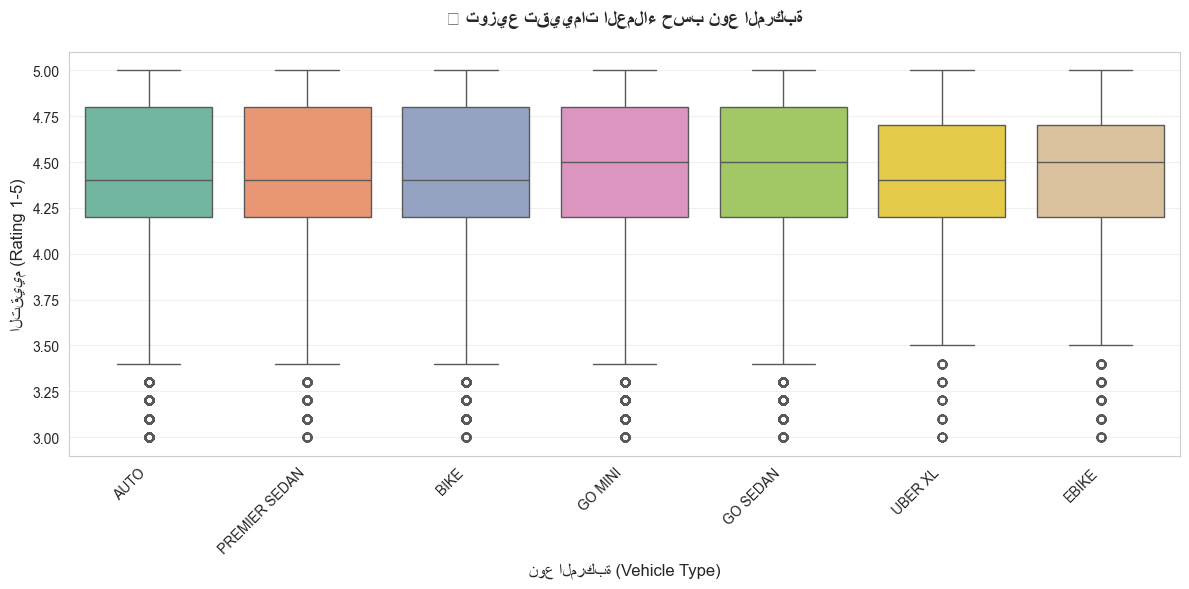

✓ Visualization 5: Rating by vehicle type created


In [17]:
# Visualization 5: Box Plot - Rating by Vehicle Type
if "customer_rating" in df.columns and "vehicle_type" in df.columns:
    # Filter only rows with valid ratings
    rating_data = df[["customer_rating", "vehicle_type"]].dropna()
    
    if len(rating_data) > 0:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=rating_data, x="vehicle_type", y="customer_rating", palette='Set2')
        plt.title('⭐ توزيع تقييمات العملاء حسب نوع المركبة', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('نوع المركبة (Vehicle Type)', fontsize=12)
        plt.ylabel('التقييم (Rating 1-5)', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()
        print("✓ Visualization 5: Rating by vehicle type created")
    else:
        print("⚠️ No rating data found")
else:
    print("⚠️ 'customer_rating' or 'vehicle_type' column not found")

---
## الرسم البياني 6: المسافة مقابل قيمة الحجز

### ماذا سنرسم؟
رسم تشتت (Scatter Plot) يوضح العلاقة بين مسافة الرحلة وقيمة الحجز

### لماذا هذا الرسم مهم؟
يساعد في فهم العلاقة بين المسافة والسعر والتحقق من الأسعار العادلة

### ماذا نتوقع أن نلاحظ؟
علاقة إيجابية بين المسافة والسعر مع بعض التقلبات

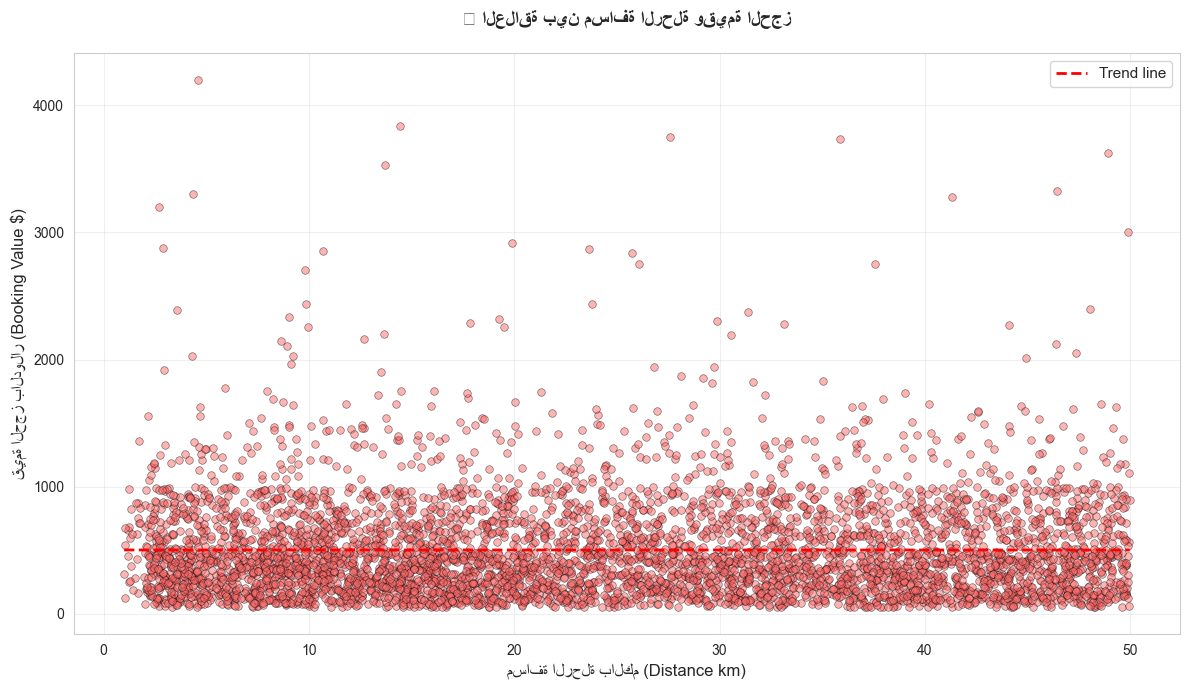

✓ Visualization 6: Distance vs booking value created
  Correlation: -0.0003


In [18]:
# Visualization 6: Scatter Plot - Distance vs Booking Value
if "ride_distance" in df.columns and "booking_value" in df.columns:
    # Filter only rows with valid data
    scatter_data = df[["ride_distance", "booking_value"]].dropna()
    scatter_data = scatter_data[(scatter_data["ride_distance"] > 0) & (scatter_data["booking_value"] > 0)]
    
    if len(scatter_data) > 0:
        # Sample if too large (for performance)
        if len(scatter_data) > 5000:
            scatter_data = scatter_data.sample(n=5000, random_state=42)
        
        plt.figure(figsize=(12, 7))
        plt.scatter(scatter_data["ride_distance"], scatter_data["booking_value"], 
                   alpha=0.5, s=30, color='#FF6B6B', edgecolors='black', linewidth=0.5)
        
        # Add trend line
        z = np.polyfit(scatter_data["ride_distance"], scatter_data["booking_value"], 1)
        p = np.poly1d(z)
        x_trend = np.linspace(scatter_data["ride_distance"].min(), scatter_data["ride_distance"].max(), 100)
        plt.plot(x_trend, p(x_trend), "r--", linewidth=2, label=f'Trend line')
        
        plt.title('📈 العلاقة بين مسافة الرحلة وقيمة الحجز', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('مسافة الرحلة بالكم (Distance km)', fontsize=12)
        plt.ylabel('قيمة الحجز بالدولار (Booking Value $)', fontsize=12)
        plt.legend(fontsize=11)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Calculate correlation
        correlation = scatter_data["ride_distance"].corr(scatter_data["booking_value"])
        print(f"✓ Visualization 6: Distance vs booking value created")
        print(f"  Correlation: {correlation:.4f}")
    else:
        print("⚠️ No valid distance/value data found")
else:
    print("⚠️ 'ride_distance' or 'booking_value' column not found")

---
## الملخص

✅ تم إنشاء 6 رسوم بيانية احترافية:

1. **تطور الحجوزات** — اتجاه الطلب عبر الزمن
2. **الحجوزات حسب المركبة** — مقارنة أنواع المركبات
3. **أسباب الإلغاء** — المشاكل الرئيسية
4. **توزيع الأسعار** — نطاق الأسعار والمتوسط
5. **التقييمات والمركبات** — جودة الخدمة حسب النوع
6. **المسافة والسعر** — العلاقة بين المتغيرات

جميع الرسوم البيانية جاهزة للعرض والتحليل!

## Summary

All visualizations have been created successfully. These charts are ready to be integrated into the Dash dashboard.

In [19]:
# Distance vs Booking Value Scatter
if 'distance' in df.columns and 'booking_value' in df.columns:
    # Sample if dataset is very large (for performance)
    sample_df = df.sample(n=min(5000, len(df)), random_state=42)
    
    fig6 = px.scatter(
        sample_df,
        x='distance',
        y='booking_value',
        title='Relationship: Trip Distance vs Booking Value',
        labels={'distance': 'Distance (km)', 'booking_value': 'Booking Value ($)'},
        height=500,
        color='booking_value',
        color_continuous_scale='Viridis',
        size='booking_value',
        opacity=0.6
    )
    
    # Add trendline
    fig6.add_scatter(
        x=sample_df['distance'].sort_values(),
        y=np.poly1d(np.polyfit(sample_df['distance'], sample_df['booking_value'], 1))(sample_df['distance'].sort_values()),
        mode='lines',
        name='Trend',
        line=dict(color='red', width=2, dash='dash')
    )
    
    fig6.update_layout(
        font=dict(size=12),
        hovermode='closest',
        xaxis_title='Distance (km)',
        yaxis_title='Booking Value ($)'
    )
    fig6.show()
    print("✓ Distance vs booking value visualization created")
else:
    print("⚠ 'distance' or 'booking_value' column not found")

⚠ 'distance' or 'booking_value' column not found


## Visualization 6: Scatter Plot - Distance vs Booking Value

Scatter plot showing relationship between trip distance and booking value.

In [20]:
# Rating by Vehicle Type
if 'rating' in df.columns and 'vehicle_type' in df.columns:
    fig5 = px.box(
        df,
        x='vehicle_type',
        y='rating',
        title='Rating Distribution by Vehicle Type',
        labels={'vehicle_type': 'Vehicle Type', 'rating': 'Rating'},
        height=450,
        color='vehicle_type',
        points='outliers'
    )
    fig5.update_layout(
        font=dict(size=12),
        hovermode='x unified',
        xaxis_title='Vehicle Type',
        yaxis_title='Rating (1-5)',
        showlegend=False
    )
    fig5.show()
    print("✓ Rating by vehicle type visualization created")
else:
    print("⚠ 'rating' or 'vehicle_type' column not found")

⚠ 'rating' or 'vehicle_type' column not found


## Visualization 5: Box Plot - Rating by Vehicle Type

Box plot showing rating distribution across vehicle types.

In [21]:
# Booking Value Distribution
if 'booking_value' in df.columns:
    fig4 = px.histogram(
        df,
        x='booking_value',
        nbins=50,
        title='Distribution of Booking Values',
        labels={'booking_value': 'Booking Value ($)', 'count': 'Frequency'},
        height=450,
        color_discrete_sequence=['#636EFA']
    )
    fig4.update_layout(
        font=dict(size=12),
        hovermode='x unified',
        xaxis_title='Booking Value ($)',
        yaxis_title='Frequency'
    )
    fig4.add_vline(
        x=df['booking_value'].mean(),
        line_dash='dash',
        line_color='red',
        annotation_text=f"Mean: ${df['booking_value'].mean():.2f}",
        annotation_position='top right'
    )
    fig4.show()
    print("✓ Booking value distribution visualization created")
else:
    print("⚠ 'booking_value' column not found")

NameError: name 'px' is not defined

## Visualization 4: Histogram - Booking Value Distribution

Distribution of booking values with histogram.

In [ ]:
# Cancellation Reasons
if 'cancellation_reason' in df.columns:
    # Filter only cancelled bookings
    cancelled = df[df['cancellation_reason'] != 'UNKNOWN']
    if len(cancelled) > 0:
        cancel_reasons = cancelled['cancellation_reason'].value_counts().head(10).reset_index()
        cancel_reasons.columns = ['Reason', 'Count']
        
        fig3 = px.bar(
            cancel_reasons,
            x='Count',
            y='Reason',
            orientation='h',
            title='Top Cancellation Reasons',
            labels={'Count': 'Number of Cancellations', 'Reason': 'Cancellation Reason'},
            height=450,
            color='Count',
            color_continuous_scale='Reds'
        )
        fig3.update_layout(
            font=dict(size=12),
            showlegend=False,
            hovermode='y unified'
        )
        fig3.show()
        print("✓ Cancellation reasons visualization created")
    else:
        print("⚠ No cancellation data found")
else:
    print("⚠ 'cancellation_reason' column not found")

## Visualization 3: Bar Chart - Cancellation Reasons

Bar chart showing top cancellation reasons.

In [ ]:
# Vehicle Type Bookings
if 'vehicle_type' in df.columns:
    vehicle_counts = df['vehicle_type'].value_counts().reset_index()
    vehicle_counts.columns = ['Vehicle_Type', 'Count']
    
    fig2 = px.bar(
        vehicle_counts,
        x='Count',
        y='Vehicle_Type',
        orientation='h',
        title='Total Bookings by Vehicle Type',
        labels={'Count': 'Number of Bookings', 'Vehicle_Type': 'Vehicle Type'},
        height=400,
        color='Count',
        color_continuous_scale='Blues'
    )
    fig2.update_layout(
        font=dict(size=12),
        showlegend=False,
        hovermode='y unified'
    )
    fig2.show()
    print("✓ Vehicle type visualization created")
else:
    print("⚠ 'vehicle_type' column not found")

## Visualization 2: Bar Chart - Bookings by Vehicle Type

Horizontal bar chart showing booking volume by vehicle type.

In [ ]:
# Time Series - Bookings Over Time
datetime_col = None
for col in df.columns:
    if 'date' in col.lower() or 'time' in col.lower():
        if pd.api.types.is_datetime64_any_dtype(df[col]):
            datetime_col = col
            break

if datetime_col:
    # Group by date and count bookings
    daily_bookings = df.groupby(df[datetime_col].dt.date).size().reset_index()
    daily_bookings.columns = ['Date', 'Bookings']
    
    fig1 = px.line(
        daily_bookings,
        x='Date',
        y='Bookings',
        title='Daily Bookings Trend Over Time',
        labels={'Bookings': 'Number of Bookings', 'Date': 'Date'},
        height=500,
        markers=True
    )
    fig1.update_layout(
        font=dict(size=12),
        hovermode='x unified',
        plot_bgcolor='rgba(240,240,240,0.5)',
        xaxis_title='Date',
        yaxis_title='Number of Bookings'
    )
    fig1.show()
    print("✓ Time series visualization created")
else:
    print("⚠ No datetime column found for time series visualization")

## Visualization 1: Time Series - Bookings Over Time

Line chart showing booking trends over time.

In [ ]:
# Load cleaned data
notebook_dir = Path.cwd().parent if 'notebooks' in str(Path.cwd()) else Path.cwd()
clean_data_path = Path(notebook_dir) / 'data' / 'processed' / 'ride_bookings_clean.csv'

df = pd.read_csv(clean_data_path)

# Convert date columns if present
date_cols = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]
for col in date_cols:
    try:
        df[col] = pd.to_datetime(df[col])
    except:
        pass

print(f"Dataset loaded: {df.shape}")
print(f"Date range: {df.iloc[:, 0] if len(date_cols) > 0 else 'N/A'}")

## Load Cleaned Data

Load the cleaned dataset.

In [22]:
# Import Required Libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)

# 04 - Data Visualizations

Create professional visualizations for the Uber Rides dataset:
- Time series trends
- Vehicle type analysis
- Cancellation reasons breakdown
- Booking value distribution
- Rating by vehicle type
- Distance vs booking value scatter plot